In [39]:
# 1. Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column

In [1]:
import pandas as pd

In [27]:
file_path = "/content/dane5.csv"

In [28]:
df = pd.read_csv(file_path)

In [29]:
full_weekly_names = {"Mon": "Monday",
    "Tue": "Tuesday",
    "Wed": "Wednesday",
    "Thu": "Thursday",
    "Fri": "Friday",
    "Sat": "Saturday",
    "Sun": "Sunday"}

In [30]:
df["created_at"] = df["created_at"].replace(full_weekly_names, regex=True)

In [31]:
df["created_at"]

,created_at
0,Tuesday May 18 16:52:03 +0000 2021
1,Wednesday May 19 11:31:01 +0000 2021
2,Tuesday May 18 17:46:25 +0000 2021
3,Tuesday May 18 19:49:34 +0000 2021
4,Wednesday May 19 05:13:22 +0000 2021
...,...
476,Thursday May 13 11:03:58 +0000 2021
477,Thursday May 13 09:50:02 +0000 2021
478,Thursday May 13 08:16:57 +0000 2021
479,Thursday May 13 11:34:56 +0000 2021


In [40]:
# Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column

In [110]:
numerical_months = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
}

In [111]:
df["user_created_at"] = df["user_created_at"].replace(numerical_months, regex=True)

In [114]:
df["user_created_at"]

,user_created_at
0,Sun 04 19 12:51:49 +0000 2020
1,Thu 10 03 13:03:25 +0000 2013
2,Wed 08 26 11:01:03 +0000 2009
3,Sun 04 07 08:03:46 +0000 2019
4,Sun 10 20 20:04:51 +0000 2013
...,...
476,Sat 01 26 19:30:44 +0000 2019
477,Thu 01 07 12:04:50 +0000 2021
478,Wed 02 11 12:01:10 +0000 2015
479,Wed 01 15 09:18:42 +0000 2020


In [41]:
# Get all links to tweets and pass them to the list

In [16]:
import re

In [29]:
tweet_pattern = r"https?://twitter\.com/\w+/status/\d+"

In [30]:
tweet_links = df["tweet_url"].astype(str).str.findall(tweet_pattern).explode().dropna().tolist()

In [31]:
tweet_links

['https://twitter.com/Bartek93794875/status/1394697302728749068', 'https://twitter.com/TVN24BiS/status/1394978896660078595', 'https://twitter.com/Magdaiks/status/1394710981184475136', 'https://twitter.com/KrzysztofKando1/status/1394741976038350849', 'https://twitter.com/KKStrojek/status/1394883858701639684', 'https://twitter.com/niewidzialni_eu/status/1394905467760091137', 'https://twitter.com/ZStolicy/status/1394975959833534464', 'https://twitter.com/iwantaxiong/status/1394992908474978310', 'https://twitter.com/RMF24pl/status/1394965467001937923', 'https://twitter.com/PrawoPLserwis/status/1394888074686078978', 'https://twitter.com/jobpoland/status/1394782429290934273', 'https://twitter.com/BizblogPl/status/1394981108069109766', 'https://twitter.com/marychlak/status/1395008369203765253', 'https://twitter.com/Dariusz_Jaqub/status/1394738302213890049', 'https://twitter.com/StarostwoZywiec/status/1394931180378677248', 'https://twitter.com/DziennikPL/status/1394966077105483779', 'https://t

In [42]:
# Get all links found in tweets and pass them to the list (urls column)

In [21]:
url_pattern = r"https?://[^\s]+"

In [22]:
url_links = df["urls"].astype(str).str.findall(url_pattern).explode().dropna().tolist()

In [27]:
url_links

['https://tvn24.pl/biznes/z-kraju/praca-zdalna-w-kodeksie-pracy-ruszaja-konsultacje-5098320', 'http://m.in', 'http://niewidzialni.eu/Profilaktyka_po_pandemii,17989.html', 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/', 'http://www.rmf24.pl/ekonomia/news-praca-zdalna-po-epidemii-szef-bedzie-musial-zaplacic-za-prad,nId,5241995', 'https://www.prawo.pl/kadry/praca-zdalna-w-epidemii-w-ue,508333.html', 'https://poland.jobrat.net/2021/05/19/asystentka-praca-zdalna-warszawa/', 'https://spidersweb.pl/bizblog/praca-zdalna-rachunki-prad-internet/', 'http://zywiec.powiat.pl/post/xxv-zdalna-sesja-rady-powiatu-w-zywcu,4453.html', 'https://gospodarka.dziennik.pl/praca/artykuly/8167209,praca-zdalna-iwona-michalek-ministerstwo-pracy.html?utm_source=dlvr.it&utm_medium=twitter', 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/', 'https://www.fakt.pl/pieniadze/prawo/

In [43]:
# Get all image links and pass them to the list (media column)

In [33]:
image_links = df[["media"]].dropna()

In [34]:
image_links

,media
14,https://twitter.com/StarostwoZywiec/status/139...
17,https://twitter.com/pemmax/status/139493254281...
31,https://twitter.com/BIPolska/status/1394965947...
33,https://twitter.com/marychlak/status/139499995...
53,https://twitter.com/emitenci/status/1394935010...
59,https://twitter.com/home_pl/status/13946907184...
62,https://twitter.com/MagdaMarrkefka/status/1394...
98,https://twitter.com/charm_breeze/status/139458...
107,https://twitter.com/SiecObywatelska/status/139...
163,https://twitter.com/BettyElaWhite/status/13946...


In [44]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.

In [117]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [118]:
import spacy

In [119]:
nlp = spacy.load("en_core_web_sm")

In [121]:
file_path = "/content/dane5.csv"

with open(file_path, "r", encoding = "utf-8") as file:
  text = file.read()

In [122]:
doc = nlp(text)

In [128]:
df["text_without_stopwords"] = df["text"].apply(lambda text: " ".join([token.text for token in nlp(text) if not token.is_stop]) if isinstance(text, str) else text)


In [131]:
df["text_without_stopwords"]

0      [ WIDEO ] \n @CzarnekP : Nasza młodzież musi w...
1      Rozpoczynamy ustawowe konsultacje przepisów re...
2      [ WIDEO ] \n @CzarnekP : Nasza młodzież musi w...
3      [ WIDEO ] \n @CzarnekP : Nasza młodzież musi w...
4      Oczywiście bez związku z nauka zdalną . https:...
                             ...                        
476    co moja szkoła odpierdala przechodzi wszystko ...
477    Zdalna szkoła nie zastąpi interakcji z nauczyc...
478    Rekruter osoba z orzeczeniem - praca zdalna - ...
479    Zdalna szkoła nie zastąpi interakcji z nauczyc...
480    Zdalna szkoła nie zastąpi interakcji z nauczyc...
Name: text_without_stopwords, Length: 481, dtype: object


In [56]:
# 2. List the top 5 tweets with the highest number of likes.

In [134]:
df = pd.read_csv(file_path)

In [137]:
df_top_likes = df['favorite_count']

In [139]:
top_likes = df_top_likes.sort_values(ascending=False)

In [141]:
top_likes.head(5)

,favorite_count
450,481
475,375
398,178
214,152
163,77


In [288]:
selected_rows = [450, 475, 398, 214, 163]

In [328]:
df.iloc[selected_rows]['text']

,text
450,"Kochani, mamy to! Udało mi się załatwić sesję ..."
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...
398,"InPost zaliczył u mnie mocnego plusika, bo ofe..."
214,"Kocham pracę zdalną, bo mogę siedzieć w krótki..."
163,"Gdy dziecko ma zdalną plastykę, a zapomnieliśc..."


In [57]:
# List the top 5 tweets with the highest number of retweets.

In [142]:
df_top_retweets = df['retweet_count']

In [145]:
top_retweets = df_top_retweets.sort_values(ascending=False)

In [151]:
top_retweets.head(5)

,retweet_count
480,74
413,74
411,74
409,74
407,74


In [290]:
selected_rows_retweets = [480, 413, 411, 409, 407]

In [327]:
df.iloc[selected_rows_retweets]['text']

,text
480,Zdalna szkoła nie zastąpi interakcji z nauczyc...
413,Zdalna szkoła nie zastąpi interakcji z nauczyc...
411,Zdalna szkoła nie zastąpi interakcji z nauczyc...
409,Zdalna szkoła nie zastąpi interakcji z nauczyc...
407,Zdalna szkoła nie zastąpi interakcji z nauczyc...


In [58]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).

In [301]:
df_not_sensitive = df['possibly_sensitive']

In [302]:
type(df_not_sensitive)

pandas.core.series.Series

In [304]:
not_sensitive = df[df["possibly_sensitive"] == False][["text"]]

In [305]:
not_sensitive

,text
1,Rozpoczynamy ustawowe konsultacje przepisów re...
5,"Pandemia, praca zdalna i lockdowny spowodowały..."
8,Praca zdalna po epidemii? Szef będzie musiał z...
9,"Pandemia sprawiła, że biura opustoszały, a mie..."
10,"Asystentka (praca zdalna), Warszawa - https://..."
...,...
463,Asystent w Dziale Spedycji Morskiej - osoba z ...
469,Analityk ze znajomością języka angielskiego – ...
471,Asystent w Dziale Finansowym – praca zdalna - ...
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...


In [59]:
# Show the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).

In [309]:
df_account_earliest = df['user_created_at']

In [310]:
df_account_earliest

,user_created_at
0,Sun Apr 19 12:51:49 +0000 2020
1,Thu Oct 03 13:03:25 +0000 2013
2,Wed Aug 26 11:01:03 +0000 2009
3,Sun Apr 07 08:03:46 +0000 2019
4,Sun Oct 20 20:04:51 +0000 2013
...,...
476,Sat Jan 26 19:30:44 +0000 2019
477,Thu Jan 07 12:04:50 +0000 2021
478,Wed Feb 11 12:01:10 +0000 2015
479,Wed Jan 15 09:18:42 +0000 2020


In [311]:
df['year'] = df['user_created_at'].str[-4:]

In [312]:
df['year']

,year
0,2020
1,2013
2,2009
3,2019
4,2013
...,...
476,2019
477,2021
478,2015
479,2020


In [313]:
account_earliest = df['year'].sort_values(ascending=True)

In [314]:
account_earliest

,year
423,2008
363,2008
337,2008
112,2008
340,2009
...,...
216,2021
269,2021
279,2021
451,2021


In [330]:
selected_rows_earliest = [423, 363, 337, 112]

In [331]:
df.iloc[selected_rows_earliest]['text']

,text
423,@Orange_Polska Nie działa! Tak samo wczoraj do...
363,@antybodys @leweserce @Filaczynska Przecież od...
337,@AaronLejbowitz @pesymista @galopujacymajor St...
112,"Zdalna edukacja, level #Windows.\nCóra czeka n..."


In [60]:
# Show the tweets of the user with the most followers.

In [235]:
df_most_followers = df['user_followers_count']

In [236]:
most_followers = df_most_followers.sort_values(ascending=False)

In [275]:
most_followers

,user_followers_count
456,896145
81,833505
233,833505
190,833505
99,332916
...,...
299,1
464,1
264,1
243,0


In [332]:
df.iloc[456]['text']

'Szkolna przemoc też może być zdalna. Tyle, że trudniej ją zauważyć. Dorośli są bezradni #wyborcza https://t.co/4WTNPdzGYp'

In [61]:
# Show only verified users (user_verified column).

In [345]:
verified_users = df[df["user_verified"] == True]

In [347]:
verified_users["user_verified"]

,user_verified
1,True
15,True
31,True
35,True
81,True
99,True
158,True
160,True
190,True
217,True


In [348]:
verified_users["text"]

,text
1,Rozpoczynamy ustawowe konsultacje przepisów re...
15,Pracodawca zwróci za prąd? Szykują się zmiany ...
31,Rząd ureguluje pracę zdalną. Będzie możliwość ...
35,Michałek: Ministerstwo prowadzi konsultacje do...
81,[WIDEO]\n@CzarnekP: Nasza młodzież musi wiedzi...
99,🎧#MowiaPrezydenci: Jaki obraz ochrony zdrowia ...
158,Europejczycy na home office. Jak Polska wypada...
160,🎧#MowiaPrezydenci: Jaki obraz ochrony zdrowia ...
190,Powrót do szkół. Nowe rozporządzenie\n#wieszwi...
217,Pół-turyści tworzą nowe trendy. Po pandemii ni...


In [62]:
# Indicate on which day of the week the tweets in the dataset were most frequently published.

In [75]:
df["created_at"].max()

'Wednesday May 19 14:38:05 +0000 2021'

In [62]:
monday = "Monday"
tuesday = "Tuesday"
wednesday = "Wednesday"
thursday = "Thursday"
friday = "Friday"
saturday = "Saturday"
sunday = "Sunday"

In [65]:
monday_count = df["created_at"].astype(str).apply(lambda x: x.count(monday)).sum()

monday_count

72

In [66]:
tuesday_count = df["created_at"].astype(str).apply(lambda x: x.count(tuesday)).sum()

tuesday_count

83

In [67]:
wednesday_count = df["created_at"].astype(str).apply(lambda x: x.count(wednesday)).sum()

wednesday_count

57

In [68]:
thursday_count = df["created_at"].astype(str).apply(lambda x: x.count(thursday)).sum()
thursday_count

109

In [69]:
friday_count = df["created_at"].astype(str).apply(lambda x: x.count(friday)).sum()

friday_count

59

In [70]:
saturday_count = df["created_at"].astype(str).apply(lambda x: x.count(saturday)).sum()

saturday_count

42

In [71]:
sunday_count = df["created_at"].astype(str).apply(lambda x: x.count(sunday)).sum()

sunday_count

59

In [88]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [89]:
day_count = {day: 0 for day in days_of_week}

In [117]:
for day in days_of_week:
    day_counts[day] = df["created_at"].astype(str).apply(lambda x: x.count(day)).sum()

In [119]:
max(day_counts)

'wednesday'

In [96]:
most_frequent_day = max(day_counts, key=day_counts.get)

In [120]:
most_frequent_day

'thursday'

In [63]:
# 3. Extract people (persName) and add them to a column called persons

In [98]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [99]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [100]:
file_path = "/content/dane5.csv"

with open(file_path, "r", encoding = "utf-8") as file:
  text = file.read()

doc = nlp(text)

In [103]:
for ent in doc.ents:
    if ent.label_ in ["PERSON"]:
        print(ent.text)

Nasza młodzież
jakich zjawisk
historię Polski
historię powszechną
Wierny PiS
Polskiej Targowicy
Młody konserwatysta
patriota
katolik chrześcijański
Grzebalski 🇵🇱♥💪
ustawowe konsultacje przepisów regulujących
Iwona Michałek
Nasza młodzież
jakich zjawisk
historię Polski
historię powszechną
Bardziej
tylko ściana
Nasza młodzież
jakich zjawisk
historię Polski
historię powszechną
doceniam ludzi przyzwoitych
Strojek
praca zdalna
lockdowny
Po opanowaniu wirusa
spodziewać się dużych kolejek
ustawy regulujący pracę zdalną
Życie Stolicy - Warszawa
paypalu
dobrze XD
Acid Angel
zdalna po epidemii?
Szef będzie
zapłacić za prąd i internet
Gorąca Linia
danych  @EU_Eurostat
poniżej unijnej średniej
serwisu internetowego
orzeczenia
href=""http://poland.berardi.tv
praca zdalna
jobpoland,61688,,http://poland.berardi.tv
Praca zdalna w końcu w Kodeksie
skończyłam swoją
zdalna lekcje
mary
taylor
będą
niego głosować też
i innych tego
nie mają pojęcia
rok programu szkolnictwa
zdalna nauka wychowa
dużej części 

In [104]:
df['persons'] = df['text'].apply(lambda text: ", ".join([ent.text for ent in nlp(text).ents if ent.label_ == "PERSON"]))

In [107]:
df['persons']

,persons
0,"Nasza młodzież, jakich zjawisk, historię Polsk..."
1,Rozpoczynamy ustawowe konsultacje przepisów re...
2,"Nasza młodzież, jakich zjawisk, historię Polsk..."
3,"Nasza młodzież, jakich zjawisk, historię Polsk..."
4,bez związku z
...,...
476,"mi się, strzępić aka stukac, mieszają nam, cie..."
477,"nie zastąpi interakcji z nauczycielem, Telepor..."
478,Rekruter osoba z
479,"nie zastąpi interakcji z nauczycielem, Telepor..."


In [64]:
# Extract places (placeName) and add them to a column called places

In [108]:
for ent in doc.ents:
    if ent.label_ in ["GPE"]:
        print(ent.text)

in_reply_to_screen_name
in_reply_to_status_id
quote_id
user_friends_count
wiedzieć
miejscu
pracę zdalną - poinformowała
wiedzieć
miejscu
wiedzieć
miejscu
ojciec
patriota 🇵🇱
Hanys
iwantaxiong
aktualności
wydarzenia
UE
Finlandii
miejscu
Poland
Poland
понимаю
Jod
Starostwo Żywiec
wiadomości
wydarzenia
komentarze
Fotografii
działacz podziemnej
Polska",Krakowianin
wstałam
jestem_zjebemm,13009,,,false
🇪
działacz podziemnej
Polska",Krakowianin
twitteroweksiazkary
kwasożłop ܢܢ,CzekoloveG,8467,,,false

nic nie kosztuje""",13702,4735,3804,1,London
2021,,,,0,1394723646678110211,,,,pl,,,,12,1394693226825764873,tvp_info,"<a
wiedzieć
miejscu
Janek29409198,13093,,,false
kraj
Zdalna
biznes
taki
pracować
tylko
Polska",Free City
Stara
tylko
ale chyba po
własność
Wrapowa
Moja
stan
Kilka
Vademecum
wiedzieć
miejscu
🇪
Wojciech
MonikaM1987,58117,,,false
Poland",home_pl
Kiedy
🇧
szkoła
szkoła
JᴇꜱT UꜱᴘʀᴀᴡɪᴇᴅʟɪᴡɪᴇɴɪᴇM.
Pʀᴢʏᴢᴡᴏɪᴛᴏꜱ́Ć
ogarnął
Lubelskie
Lubelskie
Oferty
wiadomości
kraj
Empik
wypadki
bankowości, pap

In [109]:
df['places'] = df['text'].apply(lambda text: ", ".join([ent.text for ent in nlp(text).ents if ent.label_ == "GPE"]))

In [110]:
df['places']

,places
0,"wiedzieć, miejscu"
1,
2,"wiedzieć, miejscu"
3,"wiedzieć, miejscu"
4,
...,...
476,"napisałbym, zdalna, stacjonarna nie, pizd się ..."
477,Zdalna
478,
479,Zdalna


In [65]:
# Extract organisations (orgName) and place them in the column called organisations

In [116]:
for ent in doc.ents:
    if ent.label_ in ["ORG"]:
        print(ent.text)

created_at
favorite_count
user_favourites_count
user_listed_count
skąd Polska
się
w wyniku
środę
Obserwuj
@tvn24
@FaktyTVN.",1487,172417,93,500,Polska
skąd Polska
się
w wyniku
mnie
Polska",magda
skąd Polska
się
w wyniku
https://t.co/j9T3n6cdeo",https://twitter.com/KrzysztofKando1/status/1394741976038350849,Sun
Android</a>",Oczywiście bez związku z nauka
profilaktyka zdrowotna poszła w odstawkę
Dopłata za prąd
Trzaskowski - wszystko
miarę elastyczne godziny
polegająca
spory
płacą
LOONA/OnlyOneOf/tripleS https://t.co/PmkDV2FH81
RMF
lub 📧
RMF FM
biura
miejscem pracy stał się dom
Całe prawo
Warszawa
2015,3535189403,false,"Job Offers
marychlak/status/1395008369203765253,Sat
tym
Wstrzymanie
kto za
czuwa
Aborcji
2021,,https://twitter.com
StarostwoZywiec
StarostwoZywiec,3175,,http://www.zywiec.powiat.pl
Szykują się zmiany
",749,65150,1179,375,Polska
@a_niedzielski
https://twitter.com/SpaleniakJulita/
piliśmy za zdrowie
SpaleniakJulita,6095,,,false
Apple
Dopłata za prąd
https://twitter.com/Wikt

In [114]:
df['organisations'] = df['text'].apply(lambda text: ", ".join([ent.text for ent in nlp(text).ents if ent.label_ == "ORG"]))

In [115]:
df['organisations']

,organisations
0,"skąd Polska, się, w wyniku"
1,środę
2,"skąd Polska, się, w wyniku"
3,"skąd Polska, się, w wyniku"
4,Oczywiście
...,...
476,"szkoła odpierdala przechodzi wszystko, nie chce"
477,
478,orzeczeniem - praca zdalna - Darmowe Ogloszenia
479,


In [66]:
# 4. Using the matplotlib package, create a graph showing the number of tweets per day of the week.

In [122]:
!python -m pip install -U pip
!python -m pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [123]:
import matplotlib
import matplotlib.pyplot as plt

In [125]:
df['created_at'] = pd.to_datetime(df['created_at'])

<ipython-input-125-eb962bb2d325>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [126]:
df['day_of_week'] = df['created_at'].dt.day_name()

In [127]:
df['day_of_week']

,day_of_week
0,Tuesday
1,Wednesday
2,Tuesday
3,Tuesday
4,Wednesday
...,...
476,Thursday
477,Thursday
478,Thursday
479,Thursday


In [129]:
tweet_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Text(0.5, 0, 'Day of the week')

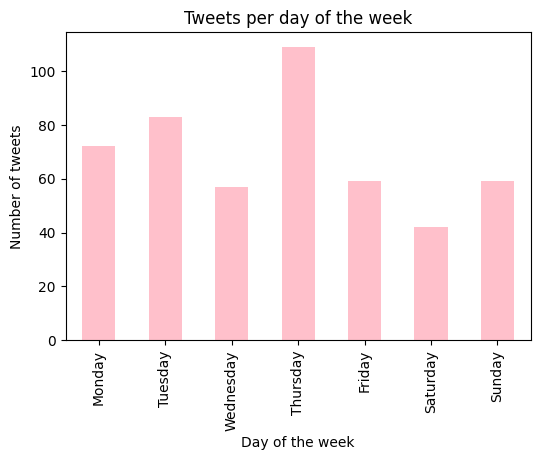

In [145]:
plt.figure(figsize=(6, 4))
tweet_counts.plot(kind='bar', color='pink')
plt.title('Tweets per day of the week', fontsize=12)
plt.ylabel('Number of tweets', fontsize=10)
plt.xlabel('Day of the week', fontsize=10)